In [58]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import math, datetime
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression

In [59]:
# Read the csv file into a pandas DataFrame
gdp = pd.read_csv('../../Clean Data/pandas_cleaned/gdp_clean_model_data.csv',
                 header = 0,
                 index_col = "date",
                 parse_dates = True)

In [60]:
gdp.tail()

,GDP_in_millions,date_1
date,,
2019-01-01,21098827,1/1/2019
2019-04-01,21340267,4/1/2019
2019-07-01,21542540,7/1/2019
2019-10-01,21729124,10/1/2019
2020-01-01,21537940,1/1/2020


In [61]:
gdp['date_1'] = pd.to_datetime([
     '-'.join(x.split()[::-1]) for x in gdp['date_1']])

In [62]:
gdp = gdp.rename(columns = {
    "GDP in millions" : "GDP_in_millions",
})

In [63]:
gdp.dtypes

GDP_in_millions             int64
date_1             datetime64[ns]
dtype: object

In [64]:
gdp.head()

,GDP_in_millions,date_1
date,,
1948-01-01,265742,1948-01-01
1948-04-01,272567,1948-04-01
1948-07-01,279196,1948-07-01
1948-10-01,280366,1948-10-01
1949-01-01,275034,1949-01-01


In [65]:
X = gdp.date_1.values.reshape(-1, 1)
y = gdp.GDP_in_millions.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


Text(0, 0.5, 'GDP in Millions of Dollars')

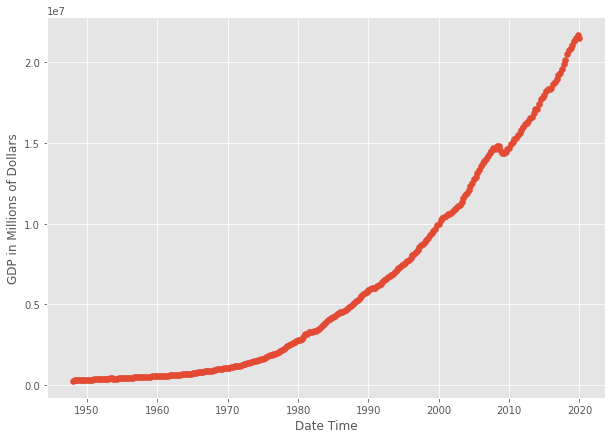

In [66]:
from matplotlib.pyplot import figure
figure (figsize = (10,7))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("GDP in Millions of Dollars")

In [67]:
gdp.tail()

,GDP_in_millions,date_1
date,,
2019-01-01,21098827,2019-01-01
2019-04-01,21340267,2019-04-01
2019-07-01,21542540,2019-07-01
2019-10-01,21729124,2019-10-01
2020-01-01,21537940,2020-01-01


In [68]:
df = gdp[["GDP_in_millions", "date_1"]]

In [69]:
forecast_col = "GDP_in_millions"

In [70]:
forecast_out = int(math.ceil(0.05*len(df)))

In [71]:
df["label"] = df[forecast_col].shift(-forecast_out)

In [72]:
print(df.count())

GDP_in_millions    289
date_1             289
label              274
dtype: int64


In [73]:
X = np.array(df.drop(["label", "date_1"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [74]:
df.dropna(inplace = True)
y = np.array(df["label"])
y = np.array(df["label"])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [76]:
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
accuracy = clf.score(X_test, y_test)

In [78]:
print(accuracy)
print(f"Forecast out is = {forecast_out}")

0.9967758912225383
Forecast out is = 15


In [79]:
forecast_set = clf.predict(X_lately)

In [80]:
print(forecast_set, accuracy, forecast_out)

[18902562.30028374 19141831.78069423 19219422.22877827 19458798.44076291
 19724933.62091901 19749252.52363452 20122079.53746612 20449936.22442546
 20595562.37382207 20748013.66675322 21015100.34753849 21157380.3485411
 21164320.17174575 21247727.49062124 21489542.63261957] 0.9967758912225383 15


In [81]:
df["Forecast"] = np.nan

In [82]:
last_quarter = df.iloc[-1].name
last_unix = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_unix = last_unix + one_quarter

In [83]:
for i in forecast_set:
    next_quarter = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_quarter
    df.loc[next_quarter] = [np.nan for x in range(len(df.columns)-1)] + [i]

Text(0, 0.5, 'GDP in Millions (US DOllars)')

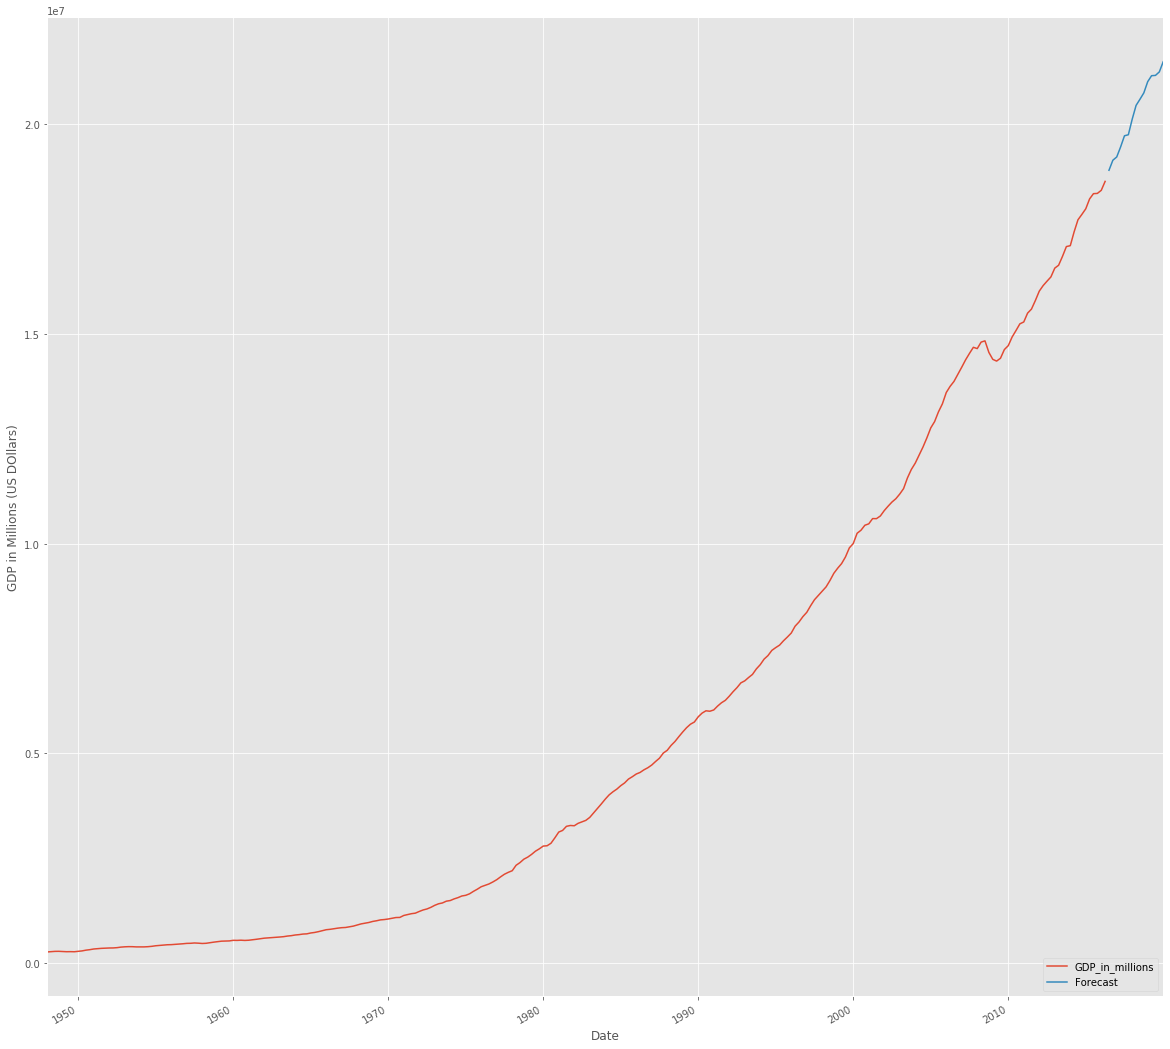

In [85]:
figure(figsize = (20, 20))
df["GDP_in_millions"].plot()
df["Forecast"].plot()
left, right = plt.xlim()
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel('GDP in Millions (US DOllars)')

